In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.features import *
import pandas as pd


In [2]:

#gis = GIS(username='izaslavsky_ucsd')  # this will ask for password. 
print("Enter the Client ID/APP ID generated from Arc GIS:")
app_id = input()
gis = GIS("https://ucsdonline.maps.arcgis.com/home", client_id=app_id)
arcgis.__version__
# Elm5V3upnnV17Q3r

Enter the Client ID/APP ID generated from Arc GIS:


 Elm5V3upnnV17Q3r


Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=Elm5V3upnnV17Q3r&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=LNEwGMdwiRgsWXwMeXJaY9FOdoNxDb&allow_verification=false


Enter code obtained on signing in using SAML:  ········


/Users/amolkale/Documents/DSE/DSE260-Capstone-Project/capstone/venv3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ucsdonline.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


'2.1.0'

In [3]:
def get_feature_layer(service_url):
    return FeatureLayer(url=service_url,gis=gis)

In [4]:
def explore_feature_layer(feature_layer):
    
    # one of the properties to check serviceItemId
    print(f'serviceItemId: {feature_layer.properties.serviceItemId}')
    
    # what operations are possible over this layer ?
    print(f'Capabalities: {feature_layer.properties.capabilities}')
    
    # How can we determine CRS of a layer (called "spatial_reference"). 

    # By converting it to a featureset - using query() without parameters -  and then retrieving its spatial reference
    # note that "spatial reference" is a property of a featureset, but not of a layer


    feature_set = feature_layer.query()
    print(f'Type of feature set: {type(feature_set)}')
    print(f'Spatial Reference for the Feature Layer: {feature_set.spatial_reference}')
    

##### Exploring some other Feature Layer which is already present in UCSDOnline

In [5]:
# Let's check 
explore_feature_layer(get_feature_layer(service_url='https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/PrivateOwnedVacantUndeveloped_SanDiegoCounty_2019/FeatureServer/0'))

serviceItemId: 2fcb4ad8fca84454aafba971782c3f72
Capabalities: Query,Extract
Type of feature set: <class 'arcgis.features.feature.FeatureSet'>
Spatial Reference for the Feature Layer: {'wkid': 102646, 'latestWkid': 2230}


In [6]:
# Exploring breweries features:
explore_feature_layer(get_feature_layer('https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/Brewery_Locations_in_San_Diego_WFL1/FeatureServer/0'))

serviceItemId: e435c0dd31c3447db9503272edf7abf0
Capabalities: Query
Type of feature set: <class 'arcgis.features.feature.FeatureSet'>
Spatial Reference for the Feature Layer: {'wkid': 102100, 'latestWkid': 3857}


In [7]:
service_url = 'https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/sandag_census_block_groups/FeatureServer/0'

In [8]:
#SANDAG census block groups layer 
sd_bg_boundaries_feature_layer = get_feature_layer(service_url=service_url)

In [9]:
explore_feature_layer(sd_bg_boundaries_feature_layer)

serviceItemId: d2bcaed179324f2ca6061172cdd66ab7
Capabalities: Query
Type of feature set: <class 'arcgis.features.feature.FeatureSet'>
Spatial Reference for the Feature Layer: {'wkid': 102100, 'latestWkid': 3857}


<Item title:"sandag_census_block_groups" type:Feature Layer Collection owner:akale_UCSDOnline>
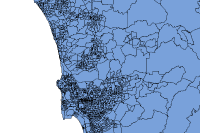

In [10]:
# explore the same from AGOL UI:
gis.content.get('d2bcaed179324f2ca6061172cdd66ab7')

In [14]:
def query_feature_layer(query_expression,feature_layer):
    arcgis.features.find_locations.find_existing_locations(input_layers=[feature_layer],expressions=query_expression)
    

In [19]:
block_grp_expr = {"operator":"and","layer":0,"where":"BLOCKGROUP = '1'"}

In [22]:
block_grp_spatial_query = {
"operator": "and",
"layer": 0,
"spatialRel": "withinDistance",
"selectingLayer": 0,
"distance": 10,
"units": "miles"
}

In [23]:
query_feature_layer(block_grp_spatial_query,sd_bg_boundaries_feature_layer)

{"messageCode": "AO_100055", "message": "Invalid expression; malformed JSON."}
{"messageCode": "AO_100061", "message": "FindExistingLocations failed."}
Failed to execute (FindExistingLocations).
Failed.


Exception: Job failed.

In [21]:
# Try it for feature layer hosted with SANDAG
query_feature_layer(block_grp_expr,get_feature_layer(service_url='https://gissd.sandag.org/rdw/rest/services/Census/Census_ZIP/MapServer/2'))

{"messageCode": "AO_100055", "message": "Invalid expression; malformed JSON."}
{"messageCode": "AO_100061", "message": "FindExistingLocations failed."}
Failed to execute (FindExistingLocations).
Failed.


Exception: Job failed.